In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
# element wise ReLU activation function
def ReLU(z):
    return np.maximum(np.zeros(len(z)), z)

# ReLU derivative function
def ReLU_prime(z):
    print(z)
    for i in range(len(z)):
        if z[i] > 0:
            z[i] = 1
        else:
            z[i] = 0
    return z

In [176]:
a = [1,-2,3,4,5, -7]
ReLU_prime(a)

[1, -2, 3, 4, 5, -7]


[1, 0, 1, 1, 1, 0]

In [177]:
# 1d histogram prototype
def histogram(x, a, b, theta, height):
    return ReLU(height+(b-a)/theta - 1*(ReLU(x/theta - a/theta)) + -1*(ReLU(-x/theta + b/theta)))

In [205]:
def forward_propagation(x, theta1, theta2, bias1, bias2):
    z1 = np.dot(x, theta1)
    a1 = ReLU(np.add(z1, bias1))
    z2 = np.dot(a1, theta2)
    a2 = ReLU(np.add(z2, bias2))
    return a1.ravel(),z2.ravel(),a2.ravel()

In [206]:
# forward propagation test
x = 5
theta1 = np.array([1,2])
theta2 = np.array([[0.5], [3]])
bias1 = np.array([1,2])
bias2 = np.array([1])
a1, z2, a2 = forward_propagation(x, theta1, theta2, bias1, bias2)
a1

array([ 6., 12.])

In [207]:
# generate initial weight matrix theta ranging from 0 to 1 for a neural network with 1 hidden layer
def initial_theta_and_bias(layer1_num, layer2_num):
    theta1 = np.random.uniform(-0.01, 0.01, [layer1_num, layer2_num])
    theta2 = np.random.uniform(-0.01, 0.01, layer2_num)
    bias1 = np.random.uniform(-0.01, 0.01, layer2_num)
    bias2 = np.random.uniform(-0.01, 0.01, 1)
    return theta1, theta2, bias1, bias2

In [220]:
def backpropagation(x, y, theta1, theta2, bias1, bias2, l):
    for i in range(len(x)):
        a1, z2, a2 = forward_propagation(x[i], theta1, theta2, bias1, bias2)
        # Layer Error
        Eo = (a2 - y[i]) * ReLU_prime(a2)
        Eh = Eo * theta2 * ReLU_prime(a1)

        # Cost derivative for weights
        dWo = Eo * a1
        dWh = Eh * x[i]

        # Update weights
        theta1 -= l * dWh
        theta2 -= l * dWo
        bias1 -= l * dWh
        bias2 -= l * Eo
    return theta1, theta2, bias1, bias2

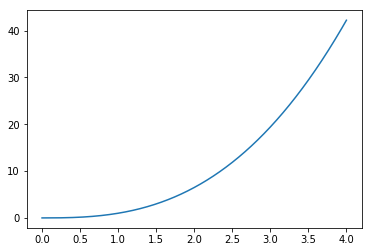

In [221]:
# polynomial function y = x^2.7
def poly(x):
    return x**2.7

x = list(np.arange(0,4,0.0001))

y = []
for i in x:
    y.append(poly(i))

plt.plot(x, y)

In [224]:
# sample data [X, Y] from the polynomial function
X = list(np.arange(2,4,0.01))

Y = []
for i in X:
    Y.append(poly(i))
theta1, theta2, bias1, bias2 = initial_theta_and_bias(1, 10)
theta1, theta2, bias1, bias2 = backpropagation(X, Y, theta1, theta2, bias1, bias2, 0.1)

[0.]
[0.00584245 0.         0.02563953 0.00261184 0.02629731 0.
 0.         0.0059858  0.00876498 0.        ]
[0.]
[0.00586705 0.         0.02571874 0.00263143 0.02638416 0.
 0.         0.00601412 0.00881221 0.        ]
[0.]
[0.00589166 0.         0.02579796 0.00265103 0.02647102 0.
 0.         0.00604244 0.00885945 0.        ]
[0.]
[0.00591627 0.         0.02587717 0.00267062 0.02655787 0.
 0.         0.00607076 0.00890668 0.        ]
[0.]
[0.00594088 0.         0.02595639 0.00269022 0.02664472 0.
 0.         0.00609908 0.00895392 0.        ]
[0.]
[0.00596549 0.         0.0260356  0.00270981 0.02673157 0.
 0.         0.0061274  0.00900115 0.        ]
[0.]
[0.0059901  0.         0.02611482 0.0027294  0.02681842 0.
 0.         0.00615572 0.00904839 0.        ]
[0.]
[0.00601471 0.         0.02619403 0.002749   0.02690527 0.
 0.         0.00618404 0.00909563 0.        ]
[0.]
[0.00603931 0.         0.02627325 0.00276859 0.02699213 0.
 0.         0.00621236 0.00914286 0.        ]
[0.]
[0.00

In [225]:
forward_propagation(2.3, theta1, theta2, bias1, bias2)

(array([0.0065807 , 0.        , 0.02801597, 0.00319966, 0.02890286,
        0.        , 0.        , 0.00683539, 0.01018205, 0.        ]),
 array([-6.06026782e-05]),
 array([0.]))